<a href="https://colab.research.google.com/github/Nadda1004/fp/blob/main/docs/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><H1>Predicting Credit Card Customers attrition</H1></center>
![picture](your link)

In [16]:
# Uncomment and run this cell to install plotly to run and view the EDA section 
#!pip install plotly

Packages Used:

In [18]:
 ## EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
sns.set(font_scale=1.1)
import plotly.io as pio

## pre processing 
from sklearn.preprocessing import *
from sklearn.model_selection import *

## Modeling 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [19]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [5]:
# import data frame from github
df = pd.read_csv('https://github.com/Nadda1004/fp/raw/main/BankChurners.csv')
# removing the last 2 columns (Suggested on the data source) and the client number 
df = df.drop(df.columns[[0,21, 22]], axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Exploratory Data Analysis (EDA)

##### Column names and data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

##### Describe Numerical Columns


In [7]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


##### Describe Categorical Columns


In [8]:
df.describe(exclude='number')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


##### Finding Null Values


In [9]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

##### Finding Duplicates

In [10]:
df.duplicated().sum()

0

### Visualization

#### Target Column **(Attrition_Flag)** Distribution

* **Existing Customer:** The customer didn't close their bank account
* **Attrited Customer:** The customer closed their bank account

##### How many customers closed and didnt close their bank account? 

In [26]:
!conda install -c plotly plotly-orca

/bin/bash: conda: command not found


In [23]:
values = [i for i in df.Attrition_Flag.value_counts()] # values to fill the pie
names = [i for i in df.Attrition_Flag.value_counts().index] # name of each part

# drawing pie plot 
fig = px.pie(df, values=values, names=names ,color_discrete_sequence=px.colors.qualitative.Pastel)

# adding style to the graph
fig.update_traces(textposition='inside', textinfo='percent+label') # adding text and names inside the pie

# specifing title and axis labels and legends 
fig.update_layout(title_text='Type Of Customers Based On Their Account Status', title_x=0.5, title_font_size=24,
                  legend=dict(orientation="v", yanchor="bottom", y=0.5, xanchor="right", x=0.8, bordercolor="Black",borderwidth=1))
fig.show(renderer="svg")

ValueError: ignored

* The First Class (Existing Customer) Distribution is 83.9%
* The Second Class (Attrited Customer) Distribution is 16.1%

#### Customers Age Range

In [12]:
# drawing histogram with 10 bins to show the count for each age range with a boxplot 
fig = px.histogram( df, x="Customer_Age", color = 'Attrition_Flag', marginal="box",
                   labels={'Customer_Age':'Age Range',} , nbins=10,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# adding style to the graph
fig.update_layout(title_text='Customer\'s Age Range By Their Account Status', title_x=0.5, title_font_size=24,
                  yaxis=dict(title='Number Of Customers'), bargap=0.05,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1))

# changing legend values by extracting the value only instead of (Attrition_Flag=Exiting Customer)
for trace in fig.data:
  trace.name = trace.name.split('=')[1]

fig.show()

ValueError: ignored

#### Customer's Gender

In [ ]:
# retrieving data to be used in the plot
y1 = [i for i in df.loc[df.Attrition_Flag == 'Existing Customer'].Gender.value_counts().sort_index()]
y2 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Gender.value_counts().sort_index()]
x1 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Gender.value_counts().sort_index().index]

# draw a bar for each target value
fig = go.Figure(data=[
    go.Bar(name = 'Existing Customer', x=x1, y=y1, text = y1, textposition='outside', marker=dict(color = 'rgb(102,197,204)')),
    go.Bar(name = 'Attrited Customer', x=x1, y=y2, text = y2, textposition='outside', marker=dict(color = 'rgb(246,207,113)'))
])

# adding style to the graph
fig.update_layout(title_text='Customer\'s Gender By Their Account Status' ,
                  title_x=0.5,  title_font_size=24,
                  yaxis=dict(title='Number Of Customers'), 
                  xaxis=dict(title='Gender', tickmode = 'array', tickvals = [0, 1],ticktext = ['Female', 'Male']) , 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1) )

fig.show()

#### Customer's Marital State

In [ ]:
# retrieving data to be used in the plot
y1 = [i for i in df.loc[df.Attrition_Flag == 'Existing Customer'].Marital_Status.value_counts().sort_index()]
y2 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Marital_Status.value_counts().sort_index()]
x1 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Marital_Status.value_counts().sort_index().index]

# draw a bar for each target value
fig = go.Figure(data=[
    go.Bar(name = 'Existing Customer', x=x1, y=y1, text = y1, textposition='outside', marker=dict(color = 'rgb(102,197,204)')),
    go.Bar(name = 'Attrited Customer', x=x1, y=y2, text = y2, textposition='outside', marker=dict(color = 'rgb(246,207,113)'))])

# adding style to the graph
fig.update_layout(title_text='Customer\'s Marital Status By Their Account Status' ,title_x=0.5, title_font_size=24,
                  yaxis=dict(title='Number Of Customers') , 
                  xaxis=dict(title='Marital Status'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1))
fig.show()

#### Customer's Education Level

In [ ]:
# retrieving data to be used in the plot
y1 = [i for i in df.loc[df.Attrition_Flag == 'Existing Customer'].Education_Level.value_counts().sort_index()]
y2 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Education_Level.value_counts().sort_index()]
x1 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Education_Level.value_counts().sort_index().index]

# draw a bar for each target value
fig = go.Figure(data=[
    go.Bar(name = 'Existing Customer', x=x1, y=y1, text = y1, textposition='outside', marker=dict(color = 'rgb(102,197,204)')),
    go.Bar(name = 'Attrited Customer', x=x1, y=y2, text = y2, textposition='outside', marker=dict(color = 'rgb(246,207,113)'))])

# adding style to the graph
fig.update_layout(title_text='Customer\'s Education Level By Their Account Status' ,title_x=0.5, title_font_size=24,
                  yaxis=dict(title='Number Of Customers') , 
                  xaxis=dict(title='Education Level'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1))
fig.show()

#### Customer's Card Type

In [ ]:
# retrieving data to be used in the plot
y1 = [i for i in df.loc[df.Attrition_Flag == 'Existing Customer'].Card_Category.value_counts().sort_index()]
y2 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Card_Category.value_counts().sort_index()]
x1 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Card_Category.value_counts().sort_index().index]

# draw a bar for each target value
fig = go.Figure(data=[
    go.Bar(name = 'Existing Customer', x=x1, y=y1, text = y1, textposition='outside', marker=dict(color = 'rgb(102,197,204)')),
    go.Bar(name = 'Attrited Customer', x=x1, y=y2, text = y2, textposition='outside', marker=dict(color = 'rgb(246,207,113)'))])

# adding style to the graph
fig.update_layout(title_text='Customer\'s Card Type By Their Account Status' ,title_x=0.5, title_font_size=24,
                  yaxis=dict(title='Number Of Customers') , 
                  xaxis=dict(title='Card Type'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1))
fig.show()

#### How Much The Customers Own Annually

In [ ]:
# retrieving data to be used in the plot
y1 = [i for i in df.loc[df.Attrition_Flag == 'Existing Customer'].Income_Category.value_counts().sort_index()]
y2 = [i for i in df.loc[df.Attrition_Flag == 'Attrited Customer'].Income_Category.value_counts().sort_index()]

# draw a bar for each target value
fig = go.Figure(data=[
    go.Bar(name = 'Existing Customer', y=y1, text = y1, textposition='outside', marker=dict(color = 'rgb(102,197,204)')),
    go.Bar(name = 'Attrited Customer', y=y2, text = y2, textposition='outside', marker=dict(color = 'rgb(246,207,113)')) ])

# adding style to the graph
fig.update_layout(title_text='Customer\'s Annaul Income By Their Account Status', title_x=0.5, title_font_size=24,
                  yaxis=dict(title='Number Of Customers') , 
                  xaxis=dict(title='Income Range (Dollars $)', tickmode = 'array', tickvals = [0, 1, 2, 3, 4, 5],
                             ticktext = ['More Than 120K', '40K - 60K', '60K - 80K', '80K - 120K', 'Less than $40K', 'Unknown']),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1))
fig.show()

#### Custmer's Period Of Relationship With The Bank

In [ ]:
# drawing histogram with 10 bins to show the count for each period range with a boxplot 
fig = px.histogram( df, x="Months_on_book", color = 'Attrition_Flag', marginal="box",
                   labels={'Months_on_book':'Number Of Months'} , nbins=10,
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# adding style to the graph
fig.update_layout(title_text='Period Of Relationship With The Bank', title_x=0.5, title_font_size=24,
                  yaxis=dict(title='Number Of Customers'), bargap=0.05,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, bordercolor="DarkGrey",borderwidth=1))

# changing legend values
for trace in fig.data:
  trace.name = trace.name.split('=')[1]

fig.show()

#### The Relationship Between Total Number Of Transactions & Number Of Inactive Months

In [ ]:
# drawing scatter
fig = px.scatter( df, x="Months_Inactive_12_mon", y='Total_Trans_Ct', color = 'Attrition_Flag',
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# adding style to the graph
fig.update_layout(title_text='Customer\'s Transactions Count Relationship With Number Of Inactive Months', title_x=0.5, title_font_size=24,
                  xaxis=dict(title='Number Of Inactive Months'), 
                  yaxis=dict(title='Number Of Transactions'),
                  legend=dict(bordercolor="DarkGrey",borderwidth=1))
# changing legend values
for trace in fig.data:
  trace.name = trace.name.split('=')[1]

fig.show()

#### The Relationship Between Customer's Card Limit & Average Card Utilization Ratio

* **Credit utilization** is the ratio of your outstanding credit card balances to your credit card limits.

In [ ]:
# drawing scatter
fig = px.scatter( df, x='Avg_Utilization_Ratio', y="Credit_Limit", color = 'Attrition_Flag',
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# adding style to the graph
fig.update_layout(title_text='Customer\'s Card Limit Relationship With Average Utilization Ratio', title_x=0.5, title_font_size=24,
                  xaxis=dict(title='Average Card Utilization Ratio'), 
                  yaxis=dict(title='Credit Limit'),
                  legend=dict(bordercolor="DarkGrey",borderwidth=1))
# changing legend values
for trace in fig.data:
  trace.name = trace.name.split('=')[1]

fig.show()

## Data Preparation

#### Label Encoding

##### Target: Attrition_Flag

In [ ]:
# convert string values to 0 and 1 - binary
le = LabelEncoder()
df.Attrition_Flag = le.fit_transform(df.Attrition_Flag.astype(str))

In [ ]:
le.classes_ # the actal values that was mapped to 0 and 1

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [ ]:
df.Attrition_Flag.value_counts() # to view how the values were mapped 

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

#### Ordianl Encoding

In [ ]:
le = LabelEncoder()
columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for i in columns:
    df[i] = le.fit_transform(df[i].astype(str))

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##### Now Let See The Relationship Of Every Column With The Target(Attrition_Flag)

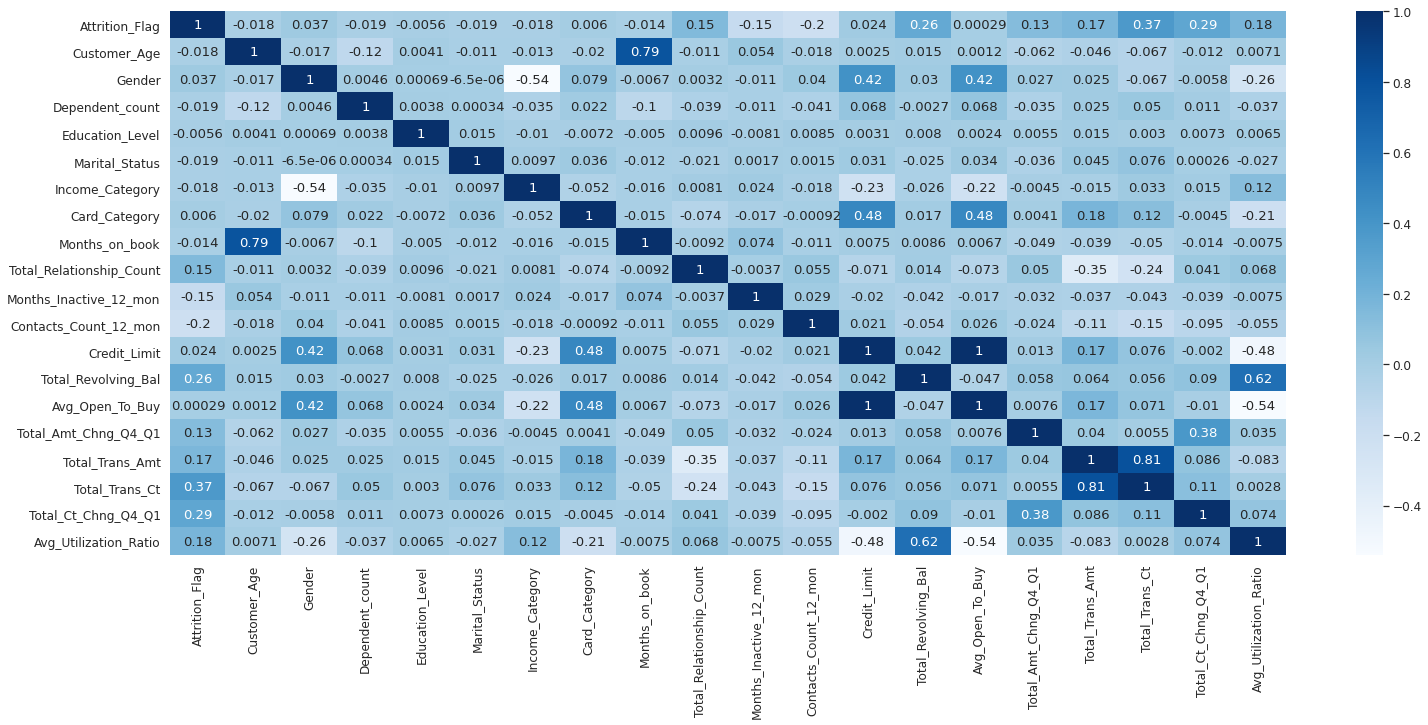

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr() , annot=True , cmap='Blues');

#### Data Split

In [ ]:
x = df.drop('Attrition_Flag', axis=1)
y = df.Attrition_Flag

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

## Modeling

#### Baseline Model

In [ ]:
baseline_preds = pd.Series([y_train.value_counts().index[0] for n in range(len(y_test))])
bl_score = accuracy_score(y_test , baseline_preds)
bl_recall = recall_score(y_test , baseline_preds)
bl_prc = precision_score(y_test , baseline_preds)
print('Baseline Model\nAccuracy= ', bl_score,'\nRecall= ', bl_recall, '\nPrecision= ', bl_prc)

Baseline Model
Accuracy=  0.84106614017769 
Recall=  1.0 
Precision=  0.84106614017769


##### Baseline Model Confusion Matrix

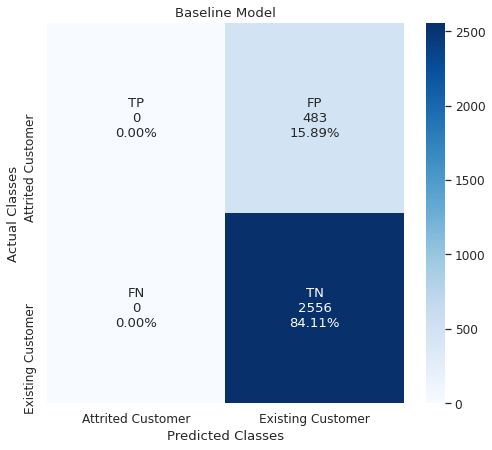

In [ ]:
cf = confusion_matrix(y_test, baseline_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Attrited Customer' , 'Existing Customer']
plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels)
plt.title("Baseline Model")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes');

#### Ensamble Learning 

* Used 4 models to compare their scores and pick the highest scoring model

In [ ]:
models = {
    "Logistic Regression": make_pipeline(LogisticRegression()),
    "knn": make_pipeline(KNeighborsClassifier()),
    "Decision Tree": make_pipeline(DecisionTreeClassifier()),
    "Random Forest": make_pipeline(RandomForestClassifier())
}

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=9000)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# Evaluate models on their own
result_ls = []
model_ls = []

# Iterate over models dict and evaluate each seprately
for key, value in models.items():

    # gather scores KFold cross validation scores
    score = evaluate_model(value, x, y)
    result_ls.append(score) # save results
    model_ls.append(key) # save model name
    print(f"Model: {key}, Score: {np.mean(score)}")

Model: Logistic Regression, Score: 0.8810108832096327
Model: knn, Score: 0.8914288569583075
Model: Decision Tree, Score: 0.9390739400143809
Model: Random Forest, Score: 0.9633655807831524


* Since **Random Forest Classifier** Scored the highest among other model i will use it and tune it to achive the best results

#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(random_state=60)
rf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [ ]:
rf_preds = rf.predict(x_test)
rf_prob = rf.predict_proba(x_test)
rf_score = accuracy_score(y_test , rf_preds)
rf_recall = recall_score(y_test , rf_preds)
rf_prc = precision_score(y_test , rf_preds)
print('Random Forest Classifier\nAccuracy= ', rf_score, '\nRecall= ', rf_recall, '\nPrecision= ',rf_prc)

Random Forest Classifier
Accuracy=  0.9661072721289898 
Recall=  0.9913928012519562 
Precision=  0.9690248565965583


##### Random Forest Model Confusion Matrix

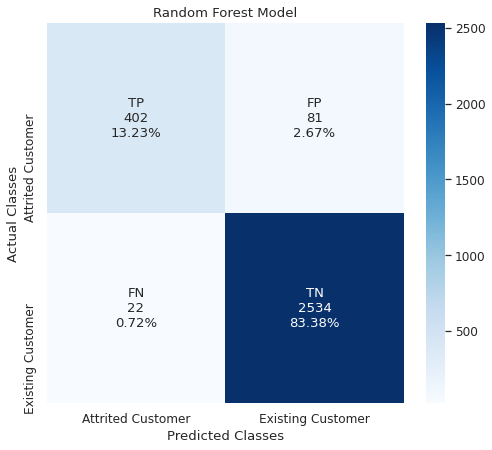

In [ ]:
cf = confusion_matrix(y_test, rf_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Attrited Customer' , 'Existing Customer']
plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels)
plt.title("Random Forest Model")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes');

##### Tuning the Model

###### GridSearchCV

In [ ]:
parms = {'max_features': ['auto', 'sqrt'] ,
         'n_estimators': [500,600],
         'bootstrap': [True, False]}

grid = GridSearchCV(rf, parms, cv=7 , n_jobs = -1, verbose = 2)
grid.fit(x_train, y_train)

Fitting 7 folds for each of 8 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:  4.8min finished


GridSearchCV(cv=7, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=60,
                                  

In [ ]:
grid.best_params_

{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 500}

In [ ]:
rf_grid = RandomForestClassifier(bootstrap= False, max_features='auto', n_estimators=500, random_state=63)
rf_grid.fit(x_train , y_train)
rf_grid_preds = rf_grid.predict(x_test)
rf_grid_prob = rf_grid.predict_proba(x_test)
rf_grid_score = accuracy_score(y_test , rf_grid_preds)
rf_grid_recall = recall_score(y_test , rf_grid_preds)
rf_grid_prc = precision_score(y_test , rf_grid_preds)
print('Random Forest Classifier After GridSearchCV\nAccuracy= ', rf_grid_score, '\nRecall= ', rf_grid_recall,
      '\nPrecision= ', rf_grid_prc)

Random Forest Classifier After GridSearchCV
Accuracy=  0.9651201052977953 
Recall=  0.9902190923317684 
Precision=  0.968989280245023


###### Random Forest After GridSearchCV Confusion Matrix 

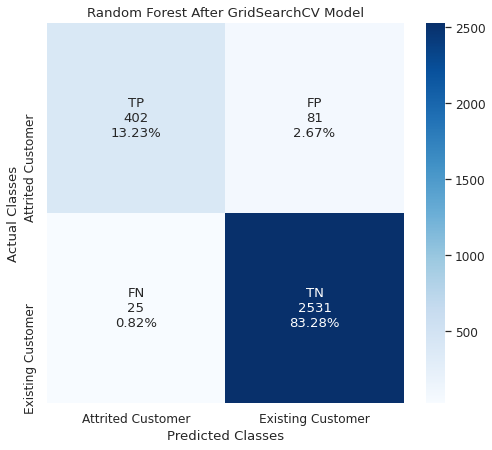

In [ ]:
cf = confusion_matrix(y_test, rf_grid_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Attrited Customer' , 'Existing Customer']
plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels)
plt.title("Random Forest After GridSearchCV Model")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes');

### Comparing Results 

###### Accuracy, Recall, Precision

In [ ]:
# Save each Accuracy and recall and precision with its model name in a data frame
results = pd.DataFrame()
results['names'] = ['Baseline' , 'Random Forest' , 'After GridSearchCV']
results['accuracy'] = [bl_score , rf_score , rf_grid_score]
results['recall'] = [bl_recall , rf_recall , rf_grid_recall]
results['precision'] = [bl_prc , rf_prc , rf_grid_prc]

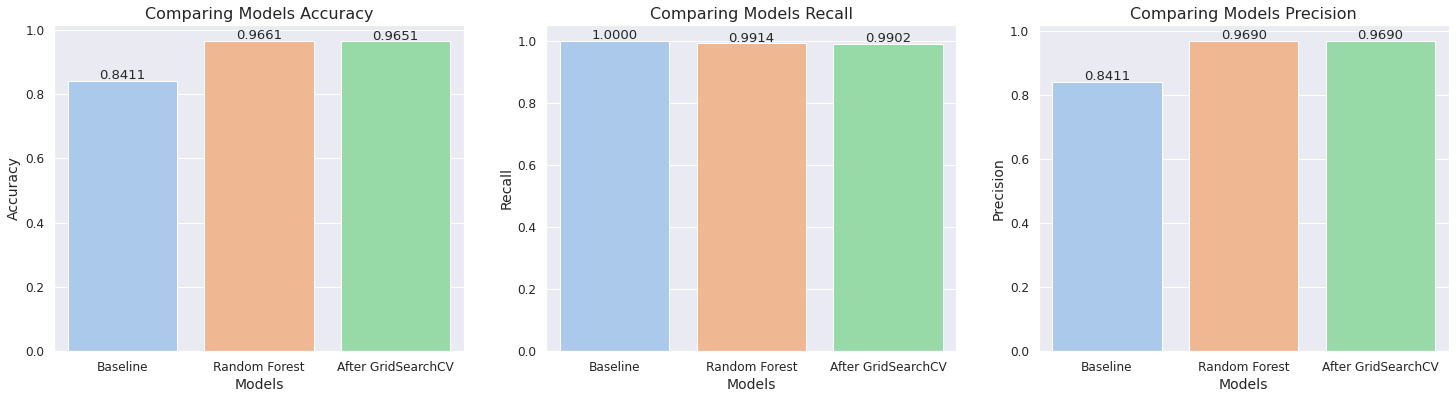

In [ ]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
splot=sns.barplot(x="names",y="accuracy",data=results, palette="pastel")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy', size=16);

plt.subplot(1,3,2)
splot=sns.barplot(x="names",y="recall",data=results, palette="pastel")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Recall", size=14)
plt.title('Comparing Models Recall', size=16)

plt.subplot(1,3,3)
splot=sns.barplot(x="names",y="precision",data=results , palette="pastel")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Precision", size=14)
plt.title('Comparing Models Precision' , size=16);

###### Roc Curve

In [ ]:
# predicted porbabilities
rf_prob1 = rf_prob[:,1]
rf_grid_prob1 = rf_grid_prob[:,1]

# Creating true and false positive rates
fpr, tpr, _ = roc_curve(y_test, rf_prob1)
fpr_g, tpr_g, _g = roc_curve(y_test, rf_grid_prob1)

# calculate area under curve (auc)
auc_rf = roc_auc_score(y_test, rf_prob1)
auc_rf_g = roc_auc_score(y_test, rf_grid_prob1)


fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.add_trace(go.Scatter(x=fpr, y=tpr, name='Random Forest: (Auc = %0.2f)' % auc_rf, mode='lines'))
fig.add_trace(go.Scatter(x=fpr_g, y=tpr_g, name='Random Forest After GridSearchCV: (Auc = %0.2f)' % auc_rf_g, mode='lines'))

fig.update_layout(title_text='ROC Curve' ,title_x=0.5, title_font_size=24,
                  yaxis=dict(title= 'True Positive Rate'),
                  xaxis=dict(title= 'False Positive Rate'),
                  legend=dict(bordercolor="DarkGrey",borderwidth=1))
fig.show()